In [1]:
from selenium import webdriver
from time import sleep

In [2]:
USERNAME = "yoshitaka3126" # ユーザー名を設定してください
PASSWORD = "XXXXXXXXXX" # パスワードを設定してください

In [3]:
driver = webdriver.Chrome(r"C:\Test_Folder\chromedriver_win32\chromedriver")
target_url = "https://www.instagram.com/"
driver.get(target_url)
sleep(3)

In [4]:
error_flg = False

In [5]:
try:
    username_input = driver.find_element_by_xpath("//input[@aria-label='電話番号、ユーザーネーム、メールアドレス']") #XPathの場合
#     username_input = driver.find_element_by_css_selector("input[aria-label='電話番号、ユーザーネーム、メールアドレス']") #CSSセレクタの場合
    username_input.send_keys(USERNAME)
    sleep(1)
    
    password_input = driver.find_element_by_xpath("//input[@aria-label='パスワード']") #XPathの場合
#     password_input = driver.find_element_by_css_selector("input[aria-label='パスワード']") #CSSセレクタの場合
    password_input.send_keys(PASSWORD)
    sleep(1)
    
    login_burron = driver.find_element_by_xpath("//button[@type='submit']") #XPathの場合
#     login_burron = driver.find_element_by_css_selector("button[type='submit']") #CSSセレクタの場合
    login_burron.submit()
    sleep(1)
    
except Exception:
    error_flg = True
    print("ユーザー名、パスワード入力時にエラーが発生しました。")

In [6]:
if error_flg is False:
    try:
        sleep(2)
        notnow_button = driver.find_element_by_xpath("//button[text()='後で']") #XPathの場合
#         notnow_button = driver.find_element_by_css_selector("button.aOOlW.HoLwm") #CSSセレクタの場合(テキストを指定するCSSセレクタはありません)
        notnow_button.click()
        sleep(1)
        
    except Exception:
        pass

In [7]:
# 確認画面が２回表示された場合も、上記と同じコードを実行します。
if error_flg is False:
    try:
        sleep(2)
        notnow_button = driver.find_element_by_xpath("//button[text()='後で']") #XPathの場合
#         notnow_button = driver.find_element_by_css_selector("button.aOOlW.HoLwm") #CSSセレクタの場合(テキストを指定するCSSセレクタはありません)
        notnow_button.click()
        sleep(1)
        
    except Exception:
        pass

In [8]:
target_username = "paulnicklen"
if error_flg is False:
    try:
        target_profile_url = target_url + target_username
        driver.get(target_profile_url)
        sleep(3)
        
    except Exception:
        print("検索時にエラーが発生しました。")
        error_flg = True

画像番号: 0
image['src']: 

画像番号: 1
image['src']: 

画像番号: 2
image['src']: https://instagram.fphx1-1.fna.fbcdn.net/v/t51.2885-19/44884218_345707102882519_2446069589734326272_n.jpg?_nc_ht=instagram.fphx1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=xfJT1nKt0MAAX_DHamY&edm=AI8ESKwBAAAA&ccb=7-5&ig_cache_key=YW5vbnltb3VzX3Byb2ZpbGVfcGlj.2-ccb7-5&oh=00_AfB6TzwinfrPBbbjiPhoN1whn35qv8dDsXe2aHHbxD1_ww&oe=642ADF4F&_nc_sid=195af5

画像番号: 3
image['src']: https://scontent-nrt1-2.cdninstagram.com/v/t51.2885-19/93756524_253798018988532_1669202571023089664_n.jpg?stp=dst-jpg_s320x320&_nc_ht=scontent-nrt1-2.cdninstagram.com&_nc_cat=1&_nc_ohc=9VSnNMNbGK0AX955Fvb&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AfCeFFRgDt9p14tQpEk_XIj03kewQwMJYiHwp254KD4r1Q&oe=642B7383&_nc_sid=8fd12b

画像番号: 4
image['src']: https://scontent-nrt1-2.cdninstagram.com/v/t51.2885-15/120036300_244428553654500_1929639767703625721_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-nrt1-2.cdninstagram.com&_nc_cat=100&_nc_ohc=Q_UhOJeqAcEAX_GDu5h&edm=AGW0Xe4BAAAA&ccb=7-5&oh=
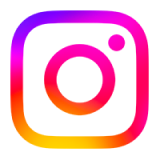
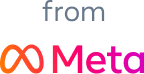

In [9]:
from bs4 import BeautifulSoup
if error_flg is False:
    try:
#        post_count = driver.find_element_by_xpath("//div[text()='投稿']/span/span").text #XPathの場合 (変更後)        
#       post_count = driver.find_element_by_xpath("//span[text()='投稿']").text #XPathの場合
#       post_count = driver.find_element_by_css_selector("span.g47SY").text #CSSセレクタの場合(テキストを指定するCSSセレクタはありません)
#        post_count = post_count.replace("投稿","").replace("件","")
#        print("投稿件数: " + post_count)
#        post_count = int(post_count)
        post_count = 100 # 取得したい投稿件数を指定してください。
        if post_count > 12:
            scroll_count = int(post_count/12) + 1
            try:
                all_images = []
                for i in range(scroll_count):
                    soup = BeautifulSoup(driver.page_source, "html.parser")
                    for image in soup.find_all("img"):
                        all_images.append(image)
                    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
                    sleep(2)
                    if i > 5:
                        break
                all_images = list(dict.fromkeys(all_images))
                for index, image in enumerate(all_images):
                    print("画像番号: " + str(index))
                    print("image['src']: " + image['src'], end="\n\n")
                
            except Exception:
                print("画面スクロール中にエラーが発生しました。")
                error_flg = True
    except Exception:
        print("投稿数が取得できませんでした。")
        error_flg = True

In [10]:
import requests
import re
import os
import shutil

path = r"C:\Test_Folder\Instagram\photo"
if error_flg is False:
    try:
        for index, image in enumerate(all_images):
            filename = "image_" + str(index) + ".jpg"
            image_path = os.path.join(path, filename)
            image_link = image["src"]
            url_ptn = re.compile(r"^(http|https)://") 
            res = url_ptn.match(image_link)
            if res:
                response = requests.get(image_link, stream=True)
                with open(image_path, "wb") as file:
                    shutil.copyfileobj(response.raw, file)
    except Exception as e:
        print(e)
        print(str(index) + "番目の画像のダウンロード・保存時にエラーが発生しました。")
        print("画像へのリンク: " + image_link)